In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("crime_dataset_india.csv")
print("Exploratory Data Analysis (EDA) on Crimes in Major Cities")

# Display dataset shape and preview
print(f"Dataset Shape: {df.shape}")
df.head()

Exploratory Data Analysis (EDA) on Crimes in Major Cities
Dataset Shape: (40160, 14)


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [4]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


In [5]:
print("\nBasic Statistical Summary:")
print(df.describe())


Basic Statistical Summary:
       Report Number    Crime Code   Victim Age  Police Deployed
count   40160.000000  40160.000000  40160.00000     40160.000000
mean    20080.500000    349.360259     44.49126        10.006250
std     11593.337742    144.169205     20.22555         5.467951
min         1.000000    100.000000     10.00000         1.000000
25%     10040.750000    225.000000     27.00000         5.000000
50%     20080.500000    349.000000     44.00000        10.000000
75%     30120.250000    474.000000     62.00000        15.000000
max     40160.000000    599.000000     79.00000        19.000000


In [6]:
df['Date Case Closed'] = df['Date Case Closed'].fillna('Not Closed').astype('object')
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')

In [7]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Report Number         0
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64


In [8]:
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df['Month'] = df['Date of Occurrence'].dt.month
df['Year'] = df['Date of Occurrence'].dt.year

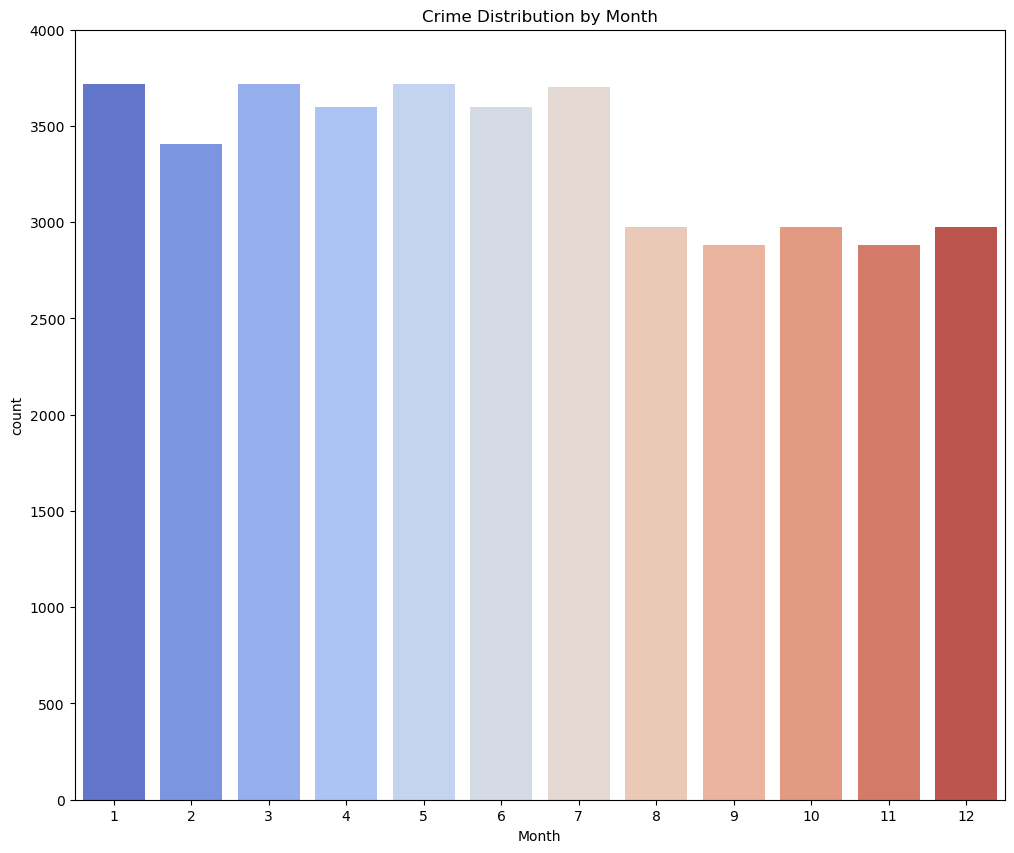

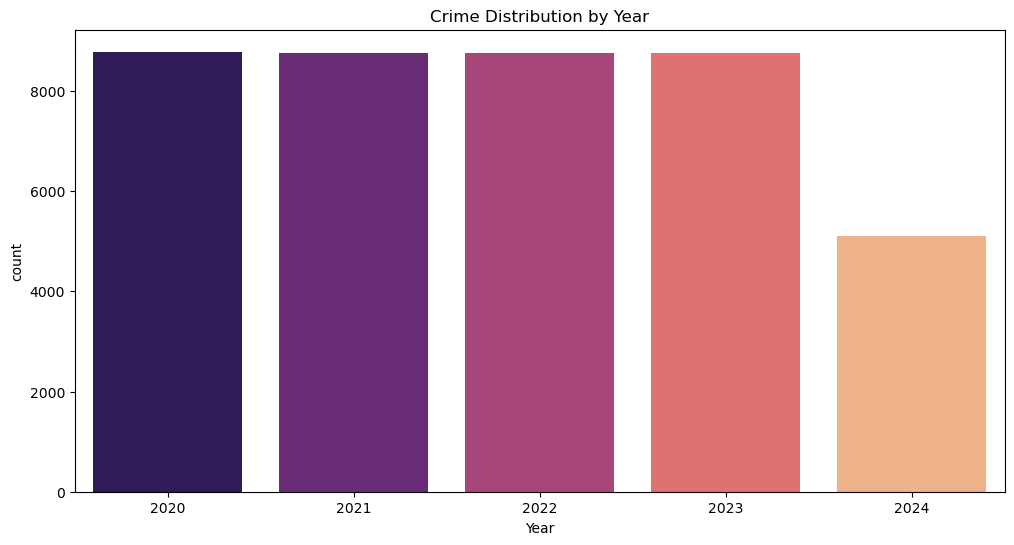

In [9]:

plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Month', palette='coolwarm')
plt.ylim(0, 4000) 
plt.title('Crime Distribution by Month')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', palette='magma')
plt.title('Crime Distribution by Year')

plt.show()

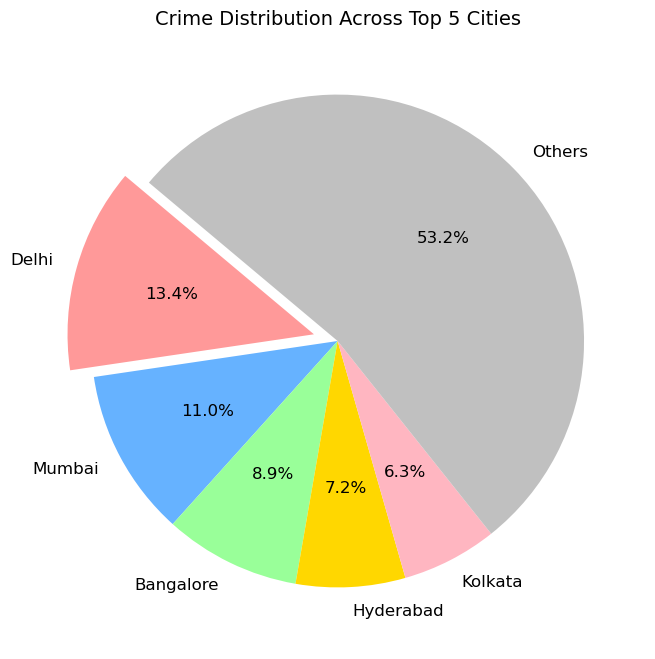

In [12]:
crime_distribution = df['City'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFB6C1', '#C0C0C0']
crime_distribution_top = crime_distribution.head(5)
others = crime_distribution[5:].sum()
crime_distribution_top['Others'] = others

plt.figure(figsize=(8, 8))
explode = [0.1] + [0] * (len(crime_distribution_top) - 1)
plt.pie(
    crime_distribution_top, 
    labels=crime_distribution_top.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=colors, 
    textprops={'fontsize': 12}
)

plt.title('Crime Distribution Across Top 5 Cities', fontsize=14)
plt.show()

In [ ]:
df['Day of Week'] = df['Date of Occurrence'].dt.day_name()
sns.countplot(data=df, x='Day of Week', palette='viridis')
plt.title('Crime Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

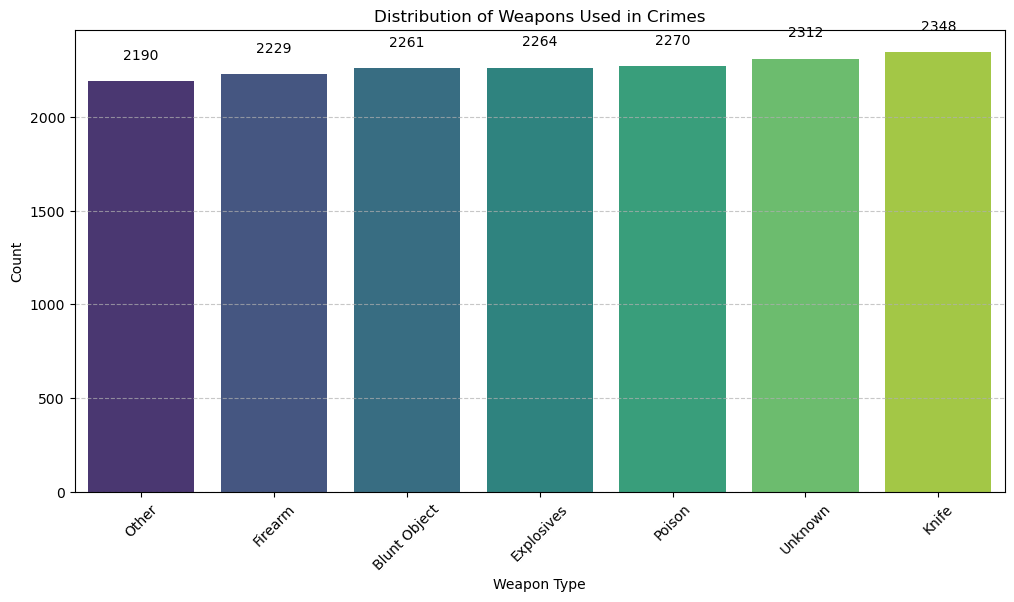

In [84]:

weapon_counts = df['Weapon Used'].value_counts().sort_values()

plt.figure(figsize=(12, 6))

sns.barplot(x=weapon_counts.index, y=weapon_counts.values, palette='viridis')

plt.title('Distribution of Weapons Used in Crimes')
plt.xlabel('Weapon Type')
plt.ylabel('Count')

plt.xticks(rotation=45)

for i, value in enumerate(weapon_counts.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


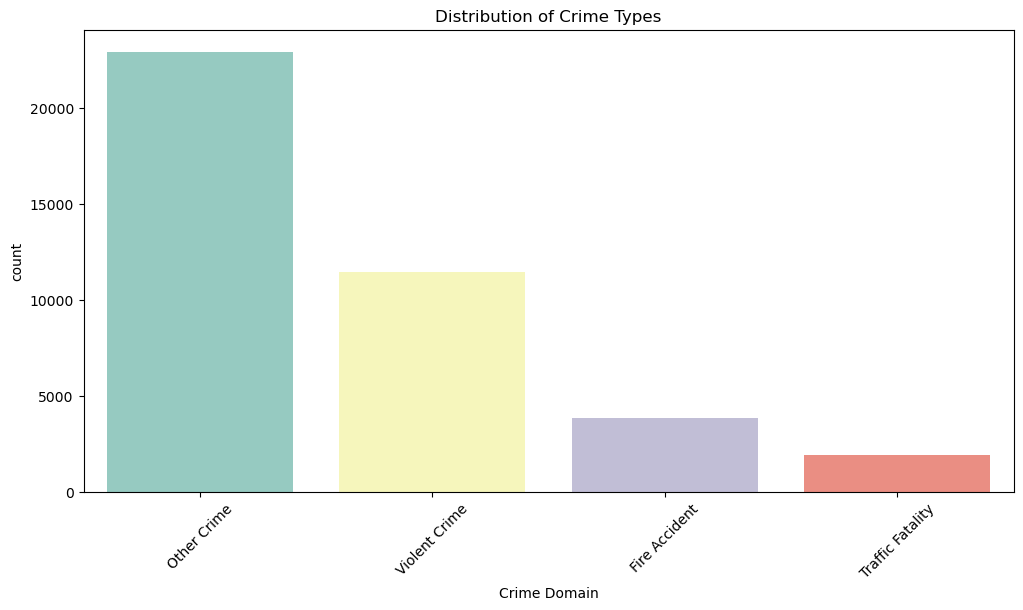

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Crime Domain', palette='Set3', order=df['Crime Domain'].value_counts().index)
plt.title('Distribution of Crime Types')
plt.xticks(rotation=45)
plt.show()


## Bivariate Analysis

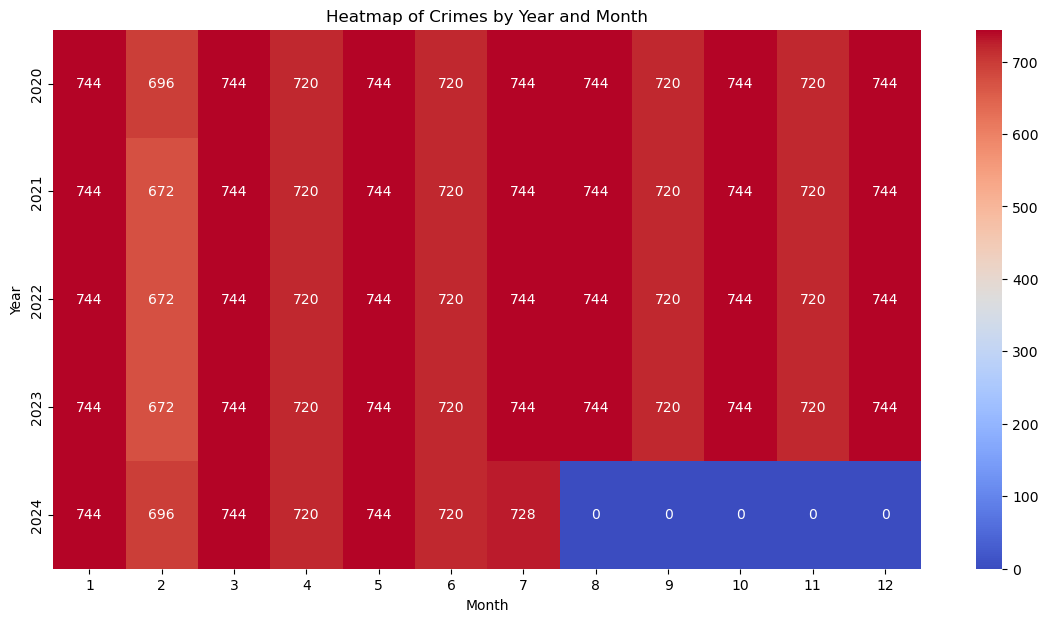

In [13]:
plt.figure(figsize=(14, 7))
sns.heatmap(pd.crosstab(df['Year'], df['Month']), cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Crimes by Year and Month')
plt.show()


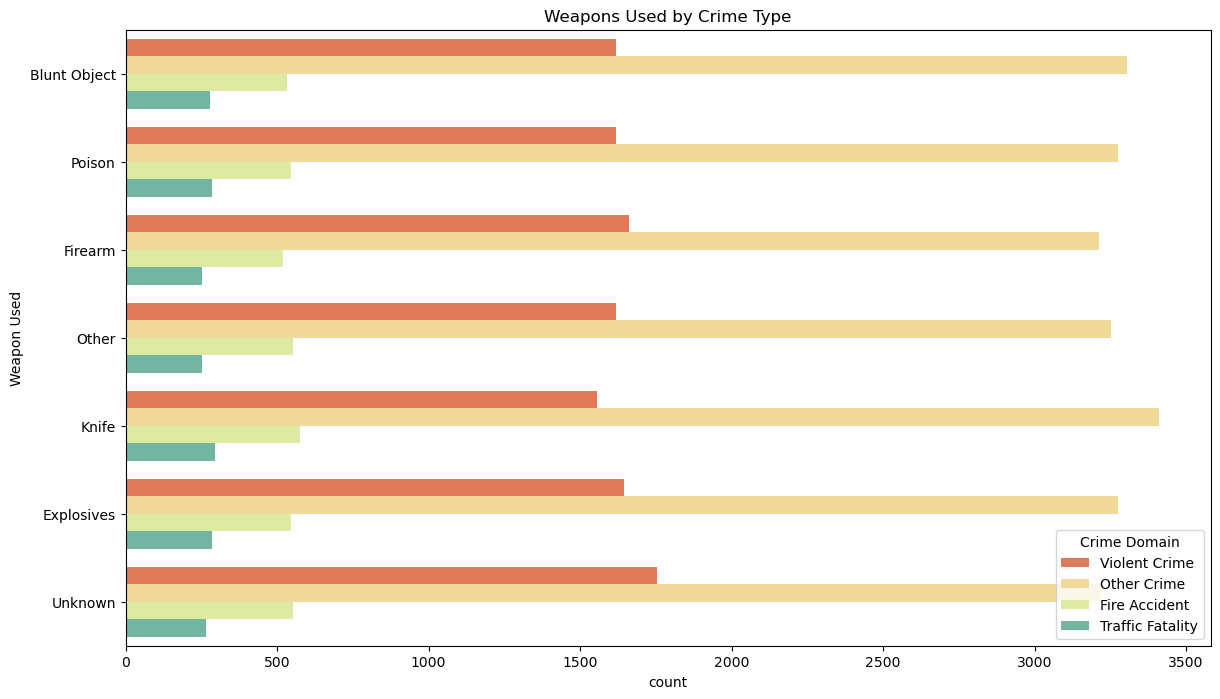

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Weapon Used', hue='Crime Domain', palette='Spectral')
plt.title('Weapons Used by Crime Type')
plt.show()

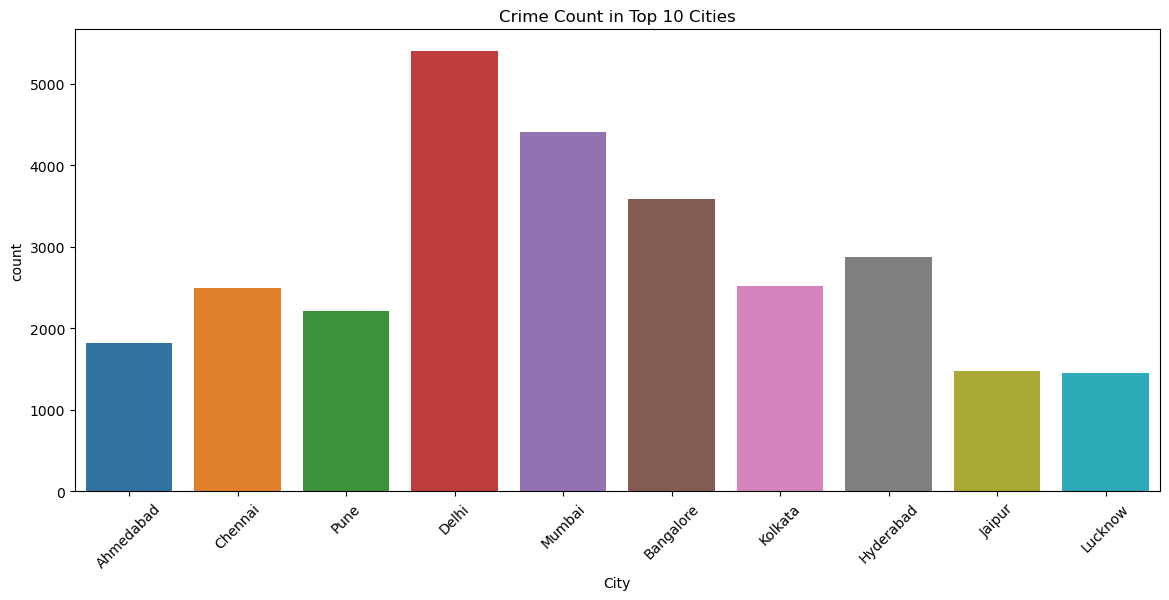

In [15]:
plt.figure(figsize=(14, 6))
top_cities = df['City'].value_counts().nlargest(10).index
sns.countplot(data=df[df['City'].isin(top_cities)], x='City', palette='tab10')
plt.title('Crime Count in Top 10 Cities')
plt.xticks(rotation=45)
plt.show()


## Multivariate Analysis

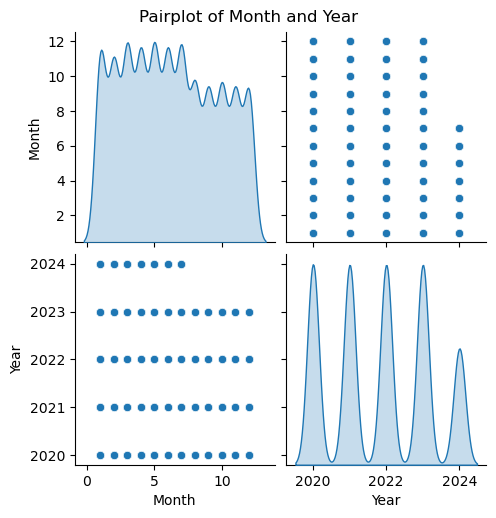

In [32]:
sns.pairplot(df[['Month', 'Year']], diag_kind='kde')
plt.suptitle('Pairplot of Month and Year', y=1.02)
plt.show()


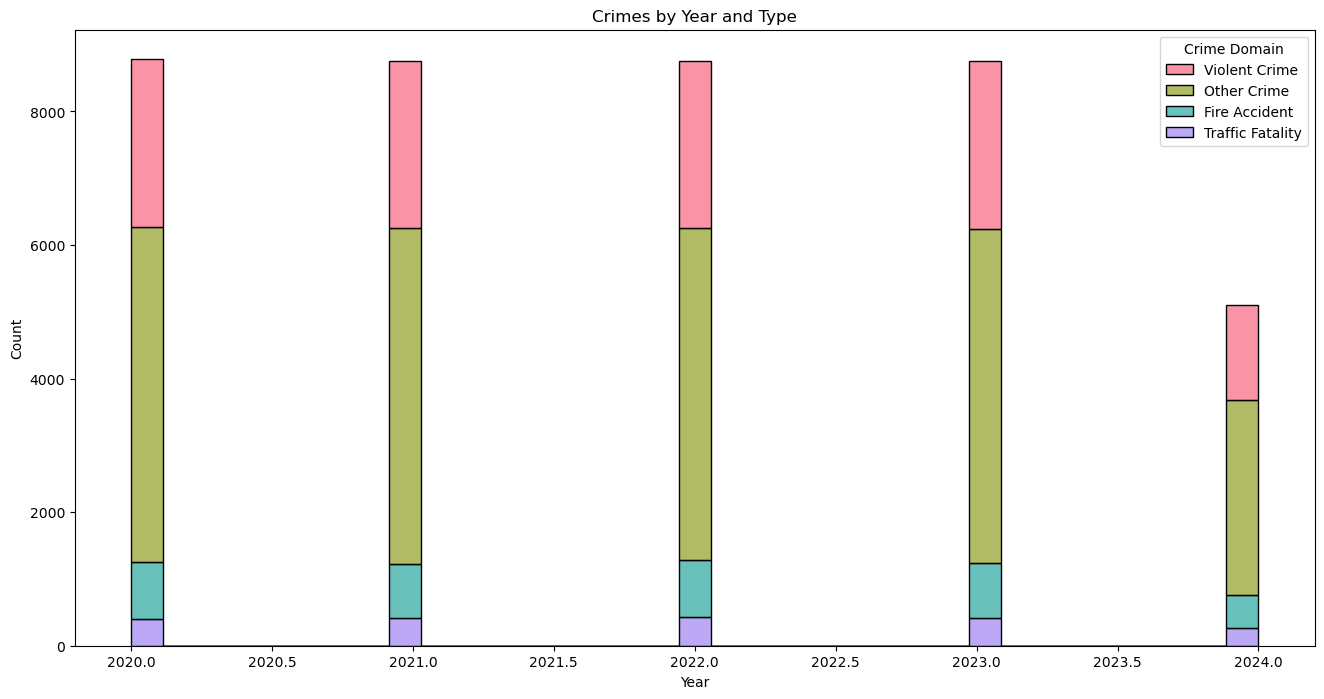

In [36]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='Year', hue='Crime Domain', multiple='stack', palette='husl')
plt.title('Crimes by Year and Type')
plt.show()


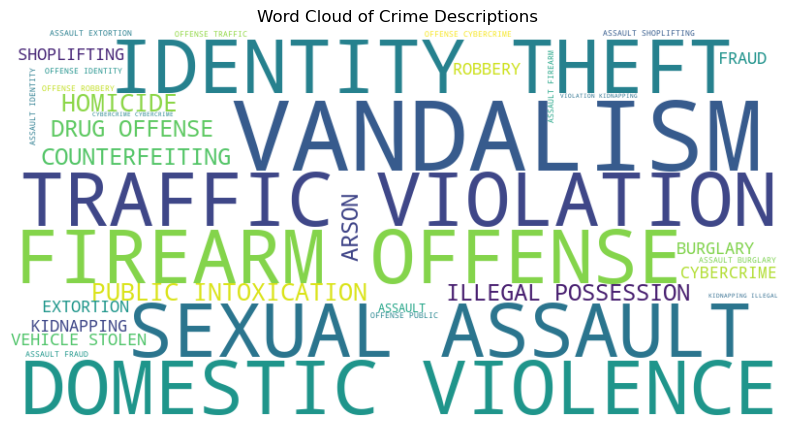

In [23]:
from wordcloud import WordCloud

crime_text = ' '.join(df['Crime Description'].dropna())
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(crime_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Crime Descriptions')
plt.show()


<Figure size 1000x600 with 0 Axes>

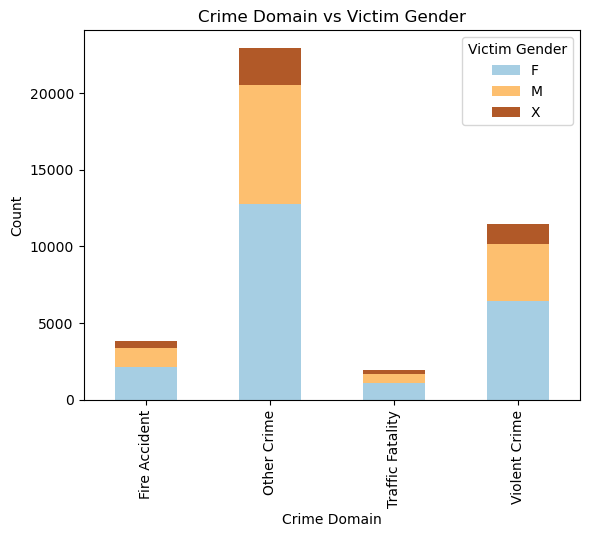

In [54]:
plt.figure(figsize=(10, 6))
stacked_data = pd.crosstab(df['Crime Domain'], df['Victim Gender'])
stacked_data.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Crime Domain vs Victim Gender')
plt.ylabel('Count')
plt.show()

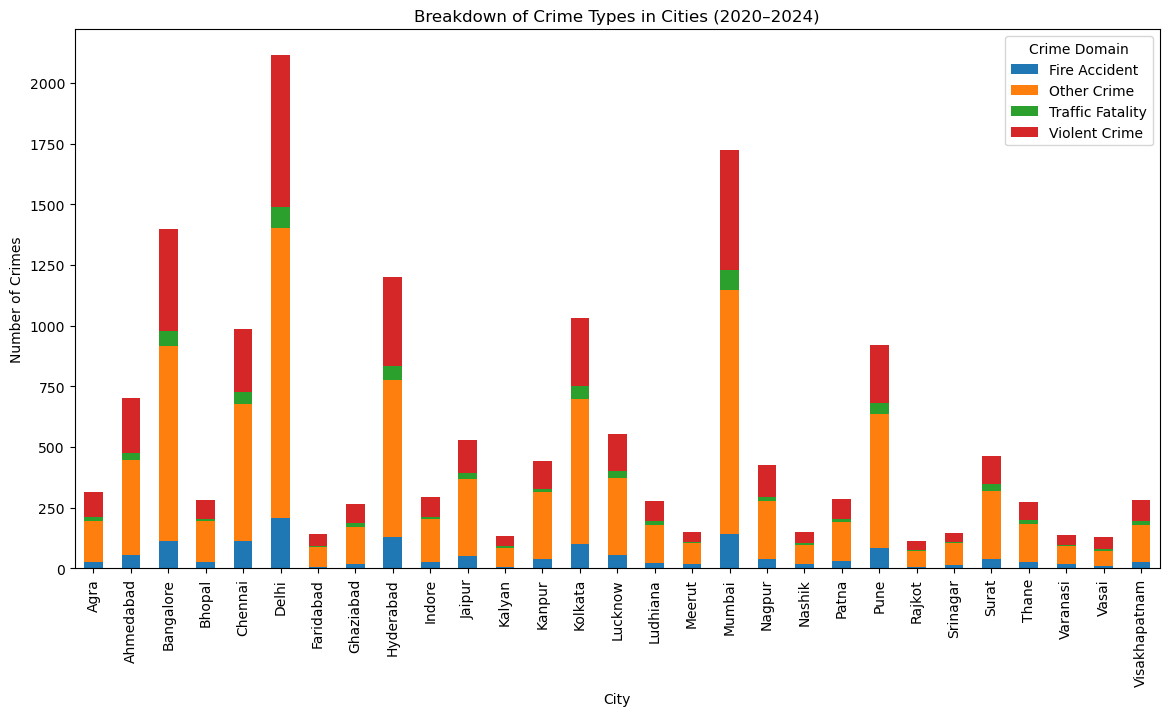

In [86]:
crime_type_city = df.groupby(['City', 'Crime Domain']).size().unstack(fill_value=0)

# Stacked bar chart
crime_type_city.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Breakdown of Crime Types in Cities (2020–2024)')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [64]:
df['Date Reported'] = df['Date Reported'].astype(str).str.split().str[0]

df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce')

print(df['Date Reported'].head())
print(f"Missing values after cleanup: {df['Date Reported'].isnull().sum()}")


Date of Occurrence
2020-01-01 00:00:00   2020-02-01
2020-01-01 01:00:00   2020-01-01
2020-01-01 02:00:00   2020-02-01
2020-01-01 03:00:00   2020-01-01
2020-01-01 04:00:00   2020-01-01
Name: Date Reported, dtype: datetime64[ns]
Missing values after cleanup: 24286


In [66]:
df = df.dropna(subset=['Date Reported'])


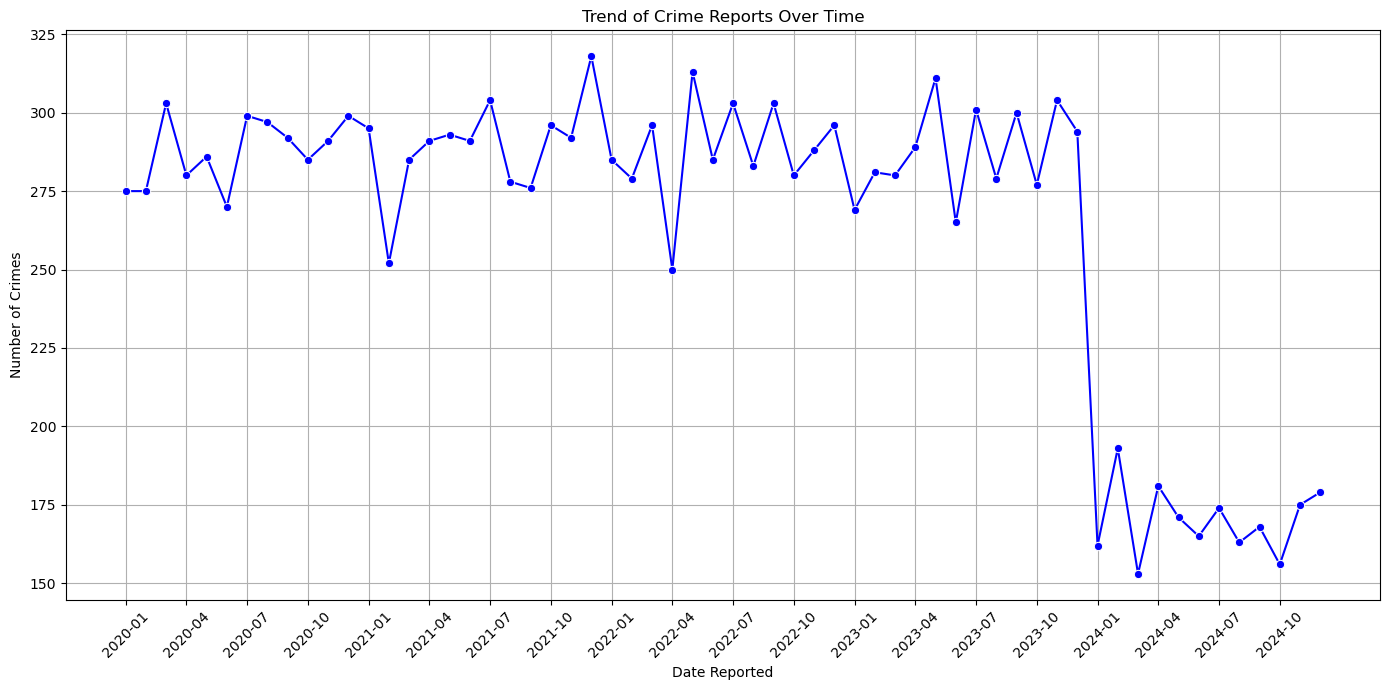

In [78]:
crime_trend = crime_trend.reset_index()
crime_trend['Date Reported'] = crime_trend['Date Reported'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=crime_trend, x='Date Reported', y=0, marker='o', color='b')
plt.title('Trend of Crime Reports Over Time')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ticks=range(0, len(crime_trend), 3))
plt.grid(True)
plt.tight_layout()
plt.show()
